In [245]:
import pandas as pd, numpy as np, seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import matplotlib. pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.inspection import permutation_importance
from xgboost import plot_importance

In [217]:
# load data
df = pd.read_csv('data_2014_final.csv')
df.head()

KeyboardInterrupt: 

In [44]:
len(df.columns)

25

In [45]:
df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'duration'],
      dtype='object')

In [49]:
len(df)

23173029

In [48]:
df.isnull().sum()

date_time                          0
site_name                          0
posa_continent                     0
user_location_country              0
user_location_region               0
user_location_city                 0
orig_destination_distance    8186528
user_id                            0
is_mobile                          0
is_package                         0
channel                            0
srch_ci                            0
srch_co                            0
srch_adults_cnt                    0
srch_children_cnt                  0
srch_rm_cnt                        0
srch_destination_id                0
srch_destination_type_id           0
is_booking                         0
cnt                                0
hotel_continent                    0
hotel_country                      0
hotel_market                       0
hotel_cluster                      0
duration                           0
dtype: int64

In [50]:
23173029-8186528

14986501

In [118]:
df = df.dropna()

In [52]:
len(df)

14986501

## Data Preparation

In [119]:
# add "have_kid" column
df['have_kid'] =  df['srch_children_cnt'].apply(lambda x: '0' if x==0 else '1')

In [120]:
df['srch_adults_cnt'] = df['srch_adults_cnt'].astype('int')

In [121]:
#scaling and transforming

tempt_distance = df['orig_destination_distance'].to_numpy()
scaled_distance = preprocessing.scale(tempt_distance)
tempt = scaled_distance.tolist()
df['orig_destination_distance'] = tempt

tempt_rooms = df['srch_rm_cnt'].to_numpy()
scaled_rooms = preprocessing.scale(tempt_rooms)
tempt = scaled_rooms.tolist()
df['srch_rm_cnt'] = tempt

tempt_cnt = df['cnt'].to_numpy()
scaled_cnt = preprocessing.scale(tempt_cnt)
tempt = scaled_cnt.tolist()
df['cnt'] = tempt

tempt_cnt = df['duration'].to_numpy()
scaled_cnt = preprocessing.scale(tempt_cnt)
tempt = scaled_cnt.tolist()
df['duration'] = tempt

tempt_cnt = df['srch_adults_cnt'].to_numpy()
scaled_cnt = preprocessing.scale(tempt_cnt)
tempt = scaled_cnt.tolist()
df['srch_adults_cnt'] = tempt

In [122]:
df['user_location_city'] = df['user_location_city'].astype('category')
df['hotel_country'] = pd.Categorical(df.hotel_country)
df['site_name'] = pd.Categorical(df.site_name)
df['channel'] = pd.Categorical(df.channel)
df['hotel_cluster'] = pd.Categorical(df.hotel_cluster)
df['is_mobile'] = pd.Categorical(df.hotel_cluster)
df['is_package'] = pd.Categorical(df.hotel_cluster)

In [64]:
s = ['user_location_city','hotel_country','site_name','channel','hotel_cluster']
for i in s:
    print('Unique values in '+str(i)+':')
    print(df[i].nunique())
    print('\n')

Unique values in user_location_city:
9381


Unique values in hotel_country:
210


Unique values in site_name:
42


Unique values in channel:
11


Unique values in hotel_cluster:
100


Unique values in srch_adults_cnt:
100




In [32]:
#dummy variable

df = pd.get_dummies(df, prefix='site_name', prefix_sep='_', 
                            columns=['site_name'])
df = pd.get_dummies(df, prefix='marketing_channel', prefix_sep='_', 
                            columns=['channel'])
df = pd.get_dummies(df, prefix='adult_count', prefix_sep='_', 
                            columns=['srch_adults_cnt'])

df.head()
#the columns that dummy variables derived from are deleted

,user_location_country,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,...,marketing_channel_1,marketing_channel_2,marketing_channel_3,marketing_channel_4,marketing_channel_5,marketing_channel_6,marketing_channel_7,marketing_channel_8,marketing_channel_9,marketing_channel_10
0,66,48862,2234.2641,12,0,1,2014-08-27,2014-08-31,2,0,...,0,0,0,0,0,0,0,0,1,0
1,66,48862,2234.2641,12,0,1,2014-08-29,2014-09-02,2,0,...,0,0,0,0,0,0,0,0,1,0
2,66,48862,2234.2641,12,0,0,2014-08-29,2014-09-02,2,0,...,0,0,0,0,0,0,0,0,1,0
3,66,35390,913.1932,93,0,0,2014-11-23,2014-11-28,2,0,...,0,0,1,0,0,0,0,0,0,0
4,66,35390,913.6259,93,0,0,2014-11-23,2014-11-28,2,0,...,0,0,1,0,0,0,0,0,0,0


In [123]:
#drop
df = df.drop(['srch_children_cnt','user_location_region','hotel_continent','hotel_market','date_time','posa_continent',
             'srch_destination_type_id','user_location_country',
             'srch_ci','srch_co','user_location_city','hotel_country'],axis=1)

## Create Subset 

In [101]:
len(df)

14986501

### Most Popular Hotel

In [152]:
df_filt = df.groupby(by = 'srch_destination_id').count().sort_values(by=['user_id'],ascending = False).head(1000)

In [154]:
df_filt.head(10)

,site_name,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_rm_cnt,is_booking,cnt,hotel_country,hotel_cluster,duration,have_kid,pop_hotel
srch_destination_id,,,,,,,,,,,,,,,
8250,669842,669842,669842,669842,669842,669842,669842,669842,669842,669842,669842,669842,669842,669842,669842
8267,432560,432560,432560,432560,432560,432560,432560,432560,432560,432560,432560,432560,432560,432560,432560
8791,273304,273304,273304,273304,273304,273304,273304,273304,273304,273304,273304,273304,273304,273304,273304
8268,236346,236346,236346,236346,236346,236346,236346,236346,236346,236346,236346,236346,236346,236346,236346
8279,219338,219338,219338,219338,219338,219338,219338,219338,219338,219338,219338,219338,219338,219338,219338
12206,162576,162576,162576,162576,162576,162576,162576,162576,162576,162576,162576,162576,162576,162576,162576
8278,161855,161855,161855,161855,161855,161855,161855,161855,161855,161855,161855,161855,161855,161855,161855
8745,151922,151922,151922,151922,151922,151922,151922,151922,151922,151922,151922,151922,151922,151922,151922
11439,151588,151588,151588,151588,151588,151588,151588,151588,151588,151588,151588,151588,151588,151588,151588


In [137]:
pop_hotel = list(df_filt.index)

In [140]:
df['pop_hotel'] = df['srch_destination_id'].apply(lambda x: '1' if x in pop_hotel else '0')

In [141]:
df = df[df.pop_hotel=='1']

In [155]:
len(df)

14954885

#### Hotels that visited times < 5 have been deleted

### Active Customers
Top 1000 visitors will be in dataset

In [190]:
df2 = df.groupby(['user_id']).count().sort_values(by=['is_mobile'],ascending = False).head(1000)

In [191]:
len(df2)

1000

In [192]:
act_cus = list(df2.index)

In [193]:
df_act = df

In [194]:
df_act['active_cust'] = df_act['user_id'].apply(lambda x: '1' if x in act_cus else '0')

In [196]:
df_act = df_act[df_act.active_cust == '1']
len(df_act)

280958

In [197]:
df = df_act
df = df.drop(['user_id','srch_destination_id','pop_hotel','active_cust'],axis=1)

## Features Remained

In [201]:
len(df.columns)

12

In [204]:
len(df)

280958

In [202]:
df.columns

Index(['site_name', 'orig_destination_distance', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_rm_cnt', 'is_booking', 'cnt',
       'hotel_cluster', 'duration', 'have_kid'],
      dtype='object')

In [262]:
df['have_kid'] = df['have_kid'].astype('category')

In [274]:
t= list(df.columns)
for i in t:
    print('data type of'+i+':')
    print(df[i].dtype)
    print('\n')

data type ofsite_name:
category


data type oforig_destination_distance:
float64


data type ofis_mobile:
category


data type ofis_package:
category


data type ofchannel:
category


data type ofsrch_adults_cnt:
float64


data type ofsrch_rm_cnt:
float64


data type ofis_booking:
int64


data type ofcnt:
float64


data type ofhotel_cluster:
category


data type ofduration:
float64


data type ofhave_kid:
category




## Correlation Matrix with Heatmap
If found two explanatory variables are too related, will choose either one of them.

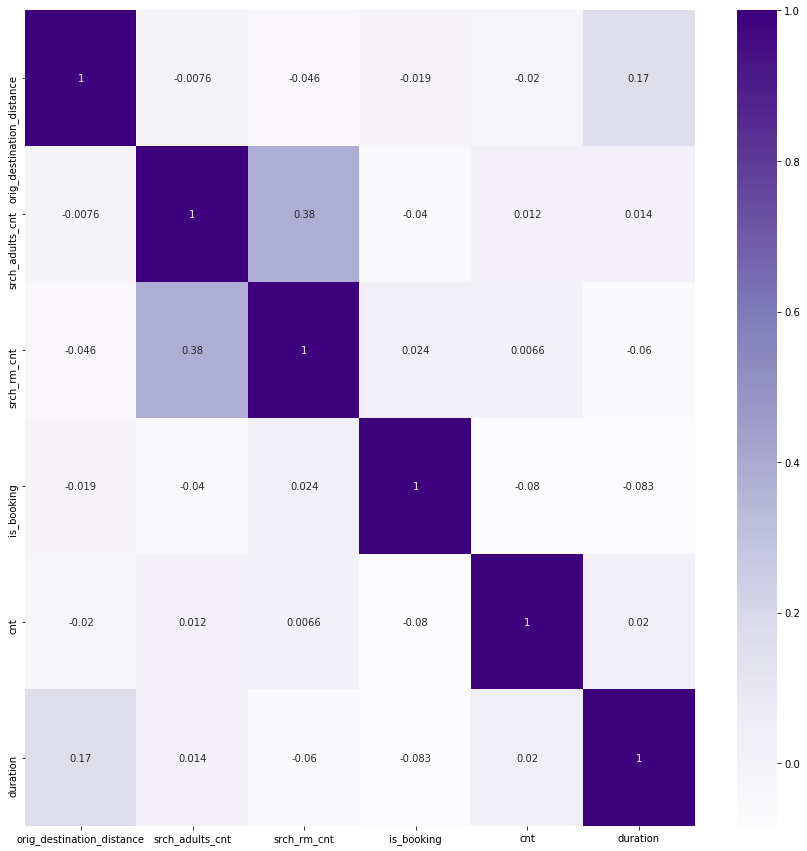

In [263]:
X = df.drop(['is_booking'],axis=1) #independent columns
y = df[['is_booking']]    #target column 
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='Purples')

#### Conclusion: all variables are not correlated to each others, can put all of them into the model

## Predictive Model

In [264]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [265]:
rf = RandomForestClassifier(n_estimators = 500, warm_start = True, max_features ='sqrt',max_depth = 6,n_jobs = -1,verbose=0)
ada = AdaBoostClassifier(n_estimators = 500,learning_rate=0.1)
et = ExtraTreesClassifier(n_estimators = 500, n_jobs = -1, max_depth=8,min_samples_leaf = 2, verbose = 0)
gb = GradientBoostingClassifier(n_estimators = 500,learning_rate=0.008,min_samples_split = 3,min_samples_leaf = 2, max_depth = 5)
dt = DecisionTreeClassifier(max_depth=8)

In [266]:
x_trainmodel = x_train.values
x_testmodel = x_test.values
y_trainmodel = y_train.values

In [267]:
#k-fold
ntrain = x_train.shape[0]
ntest = x_test.shape[0]
SEED = 0
NFOLDS = 7
kf = KFold(n_splits = NFOLDS, random_state = SEED,shuffle = False)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [268]:
def get_out_fold(clf, x_trainmodel,y_trainmodel,x_testmodel):
    oof_train = np.zeros((ntrain,))
    oof_test  =np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    for i, (train_index, test_index) in enumerate(kf.split(x_trainmodel)):
        x_tr = x_trainmodel[train_index]
        y_tr = y_trainmodel[train_index]
        x_te = x_trainmodel[test_index]
        clf.fit(x_tr,y_tr)
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test.reshape(-1,1)

In [269]:
# the first level in ensemble stacking model
rf_oof_train, rf_oof_test = get_out_fold(rf,x_trainmodel,y_trainmodel, x_testmodel)
ada_oof_train, ada_oof_test = get_out_fold(ada,x_trainmodel,y_trainmodel, x_testmodel)
et_oof_train, et_oof_test = get_out_fold(et,x_trainmodel,y_trainmodel, x_testmodel)
gb_oof_train, gb_oof_test = get_out_fold(gb,x_trainmodel,y_trainmodel, x_testmodel)
#dt_oof_train, dt_oof_test = get_out_fold(dt,x_trainmodel,y_trainmodel, x_testmodel)
#knn_oof_train, knn_oof_test = get_out_fold(knn,x_trainmodel,y_trainmodel, x_testmodel)
#svm_oof_train, svm_oof_test = get_out_fold(svm,x_trainmodel,y_trainmodel, x_testmodel)
print('Training is complete!')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/opt/anaco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training is complete!


In [270]:
#second level model - XGBoost
#x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train,dt_oof_train,knn_oof_train,svm_oof_train),axis=1)
#x_test = np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test,dt_oof_test,knn_oof_test,svm_oof_test),axis=1)

x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train),axis=1)
x_test = np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test),axis=1)

In [271]:
gbm = XGBClassifier(n_estimators = 2000,max_depth = 4,min_child_weight = 2,gamma = 0.9, subsample = 0.8,
                   colsample_bytree = 0.8, objectives = 'binary:logistic',nthread=-1, scale_pos_weight = 1).fit(x_train,y_train)
predictions = gbm.predict(x_test)

[19:27:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { objectives } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [272]:
#evaluation- precision, accuracy rate
acc = accuracy_score(y_test, predictions)

In [275]:
acc

0.9410710895975702

## Feature Importances

[12:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { objectives } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




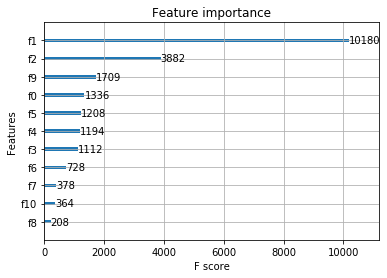

In [277]:
gbm = XGBClassifier(n_estimators = 2000,max_depth = 4,min_child_weight = 2,gamma = 0.9, subsample = 0.8,
                   colsample_bytree = 0.8, objectives = 'binary:logistic',nthread=-1, scale_pos_weight = 1).fit(x_trainmodel,y_trainmodel)
plot_importance(gbm, )

In [ ]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [278]:
# perform permutation importance
results = permutation_importance(gbm ,x_trainmodel, y_trainmodel, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
importancedf = pd.DataFrame(importance)
importancedf.columns=['Score']
x_col=pd.DataFrame(X.columns)
x_col.columns=['Labels']
feature_importance = pd.concat([importancedf,x_col],axis=1)
feature_importance.sort_values('Score',ascending = False, inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

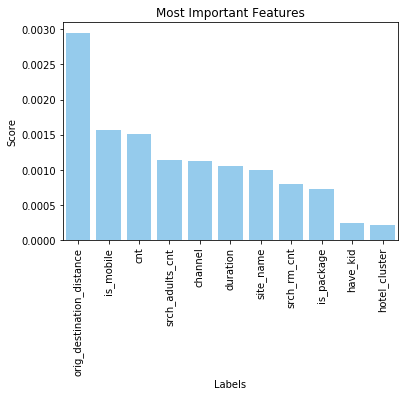

In [279]:
plot1 = sns.barplot(data = feature_importance, x = 'Labels',y = 'Score',
                    order = feature_importance['Labels'], color='lightskyblue').set_title('Most Important Features')
plt.xticks(rotation=90)